In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



def gaussian(x, u, sigma):
    return(np.exp(-0.5 * np.linalg.norm(x-u) / sigma))


442 10
(442,)


Text(0, 0.5, 'Prediction')

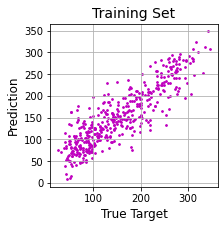

In [24]:
diabetes = datasets.load_diabetes()
X1 = diabetes.data
y = diabetes.target

# standarding mean=0 and standard deviation=1
scaler = StandardScaler()
X = scaler.fit_transform(X1)
# print(np.std(X1, axis=0))
# print(np.std(X, axis=0))

N, p = X.shape

print(N, p)
# Space for design matrix
#
M = 200
U = np.zeros((N,M))
# Basis function locations at random
#
# kmeans=KMeans(n_clusters=M, random_state=0).fit(X)
# C=kmeans.cluster_centers_

C = np.random.randn(M,p)
# Basis function range as distance between two random data
#
itr=200
sigma = 0;
for i in range(itr):
    x1 = X[np.floor(np.random.rand()*N).astype(int),:] 
    x2 = X[np.floor(np.random.rand()*N).astype(int),:]
    sigma += np.linalg.norm(x1-x2)

sigma=sigma/itr
# Construct the design matrix
#
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(X[i,:], C[j,:], sigma)
# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y
# Predicted values on training data
#
yh = U @ l
print(yh.shape)
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)


442 10
(442,)


Text(0, 0.5, 'Prediction')

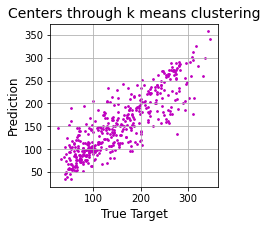

In [58]:
# taking centers using K means 

diabetes = datasets.load_diabetes()
X1 = diabetes.data
y = diabetes.target

# standarding mean=0 and standard deviation=1
scaler = StandardScaler()
X = scaler.fit_transform(X1)
# print(np.std(X1, axis=0))
# print(np.std(X, axis=0))

N, p = X.shape

print(N, p)
# Space for design matrix
#
M = 200
U = np.zeros((N,M))
# Basis function locations at random
#
kmeans=KMeans(n_clusters=M, random_state=0).fit(X)
C=kmeans.cluster_centers_

# C = np.random.randn(M,p)
# Basis function range as distance between two random data
#
itr=200
sigma = 0;
for i in range(itr):
    x1 = X[np.floor(np.random.rand()*N).astype(int),:] 
    x2 = X[np.floor(np.random.rand()*N).astype(int),:]
    sigma += np.linalg.norm(x1-x2)

sigma=sigma/itr
# Construct the design matrix
#
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(X[i,:], C[j,:], sigma)
# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y
# Predicted values on training data
#
yh = U @ l
print(yh.shape)
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Centers through k means clustering", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)


(442,)


Text(0, 0.5, 'Prediction')

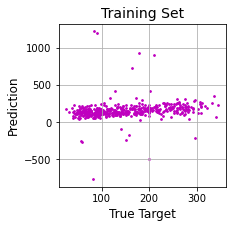

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, y, test_size=0.3)
N_train, p_train = X_train.shape
N_test, p_test= X_test.shape

for i in range(N_train):
    for j in range(M):
        U[i,j] = gaussian(X_train[i,:], C[j,:], sigma)
# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y

for i in range(N_test):
    for j in range(M):
        U[i,j] = gaussian(X_test[i,:], C[j,:], sigma)
        
# Predicted values on training data
#
yh = U @ l
print(yh.shape)

fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

KFold(n_splits=10, random_state=None, shuffle=False)
(442,)


Text(0, 0.5, 'Prediction')

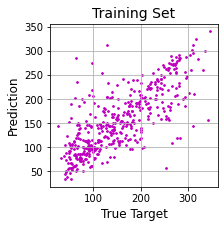

In [35]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    N_train, p_train = X_train.shape
    N_test, p_test= X_test.shape

    for i in range(N_train):
        for j in range(M):
            U[i,j] = gaussian(X_train[i,:], C[j,:], sigma)
    # Pseudo inverse solution for linear part
    #
    l = np.linalg.inv(U.T @ U) @ U.T @ y

    for i in range(N_test):
        for j in range(M):
            U[i,j] = gaussian(X_test[i,:], C[j,:], sigma)

    # Predicted values on training data
    #
    yh = U @ l
print(yh.shape)

fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

(442,)


Text(0, 0.5, 'Prediction')

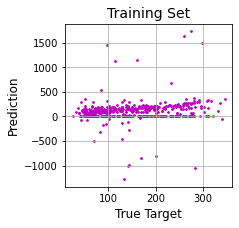

In [37]:
# Space for design matrix
#
M = 200
U = np.zeros((N,M))
# Basis function locations at random
#
kmeans=KMeans(n_clusters=M, random_state=0).fit(X)
C=kmeans.cluster_centers_

# C = np.random.randn(M,p)
# Basis function range as distance between two random data
#
itr=200
sigma = 0;

for i in range(itr):
    x1 = X[np.floor(np.random.rand()*N).astype(int),:] 
    x2 = X[np.floor(np.random.rand()*N).astype(int),:]
    sigma += np.linalg.norm(x1-x2)

sigma=sigma/itr

from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, y, test_size=0.3)
N_train, p_train = X_train.shape
N_test, p_test= X_test.shape

for i in range(N_train):
    for j in range(M):
        U[i,j] = gaussian(X_train[i,:], C[j,:], sigma)
# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y

for i in range(N_test):
    for j in range(M):
        U[i,j] = gaussian(X_test[i,:], C[j,:], sigma)
        
# Predicted values on training data
#
yh = U @ l
print(yh.shape)

fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

(442,)


Text(0, 0.5, 'Prediction')

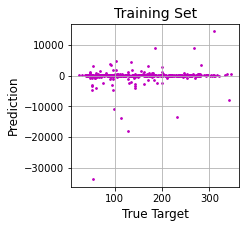

In [38]:
# Space for design matrix
#
M = 300
U = np.zeros((N,M))
# Basis function locations at random
#
kmeans=KMeans(n_clusters=M, random_state=0).fit(X)
C=kmeans.cluster_centers_

# C = np.random.randn(M,p)
# Basis function range as distance between two random data
#
itr=200
sigma = 0;

for i in range(itr):
    x1 = X[np.floor(np.random.rand()*N).astype(int),:] 
    x2 = X[np.floor(np.random.rand()*N).astype(int),:]
    sigma += np.linalg.norm(x1-x2)

sigma=sigma/itr

from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, y, test_size=0.3)
N_train, p_train = X_train.shape
N_test, p_test= X_test.shape

for i in range(N_train):
    for j in range(M):
        U[i,j] = gaussian(X_train[i,:], C[j,:], sigma)
# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y

for i in range(N_test):
    for j in range(M):
        U[i,j] = gaussian(X_test[i,:], C[j,:], sigma)
        
# Predicted values on training data
#
yh = U @ l
print(yh.shape)

fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

(442,)


Text(0, 0.5, 'Prediction')

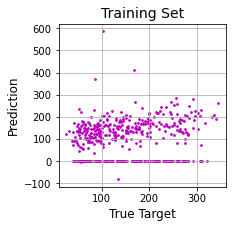

In [39]:
# Space for design matrix
#
M = 100
U = np.zeros((N,M))
# Basis function locations at random
#
kmeans=KMeans(n_clusters=M, random_state=0).fit(X)
C=kmeans.cluster_centers_

# C = np.random.randn(M,p)
# Basis function range as distance between two random data
#
itr=200
sigma = 0;

for i in range(itr):
    x1 = X[np.floor(np.random.rand()*N).astype(int),:] 
    x2 = X[np.floor(np.random.rand()*N).astype(int),:]
    sigma += np.linalg.norm(x1-x2)

sigma=sigma/itr

from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, y, test_size=0.3)
N_train, p_train = X_train.shape
N_test, p_test= X_test.shape

for i in range(N_train):
    for j in range(M):
        U[i,j] = gaussian(X_train[i,:], C[j,:], sigma)
# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y

for i in range(N_test):
    for j in range(M):
        U[i,j] = gaussian(X_test[i,:], C[j,:], sigma)
        
# Predicted values on training data
#
yh = U @ l
print(yh.shape)

fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

(133,)
(133,)
(133,)


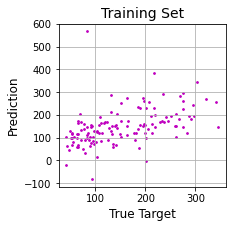

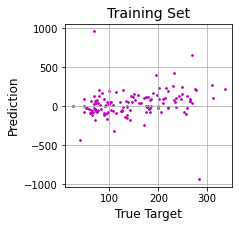

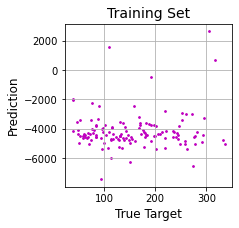

In [45]:
from sklearn.model_selection import train_test_split
# Space for design matrix
#
Mi = [100,200,300]
for M in Mi:
    
    # C = np.random.randn(M,p)
    # Basis function range as distance between two random data
    #
    itr=200
    sigma = 0;

    for i in range(itr):
        x1 = X[np.floor(np.random.rand()*N).astype(int),:] 
        x2 = X[np.floor(np.random.rand()*N).astype(int),:]
        sigma += np.linalg.norm(x1-x2)

    sigma=sigma/itr

    
    X_train, X_test, t_train, t_test = train_test_split(X1, y, test_size=0.3)
    N_train, p_train = X_train.shape
    N_test, p_test= X_test.shape
    U = np.zeros((N_train,M))

    for i in range(N_train):
        for j in range(M):
            U[i,j] = gaussian(X_train[i,:], C[j,:], sigma)
    # Pseudo inverse solution for linear part
    #
    l = np.linalg.inv(U.T @ U) @ U.T @ t_train

    U = np.zeros((N_test,M))
    for i in range(N_test):
        for j in range(M):
            U[i,j] = gaussian(X_test[i,:], C[j,:], sigma)

    # Predicted values on training data
    #
    yh = U @ l
    print(yh.shape)

    fig, ax = plt.subplots(figsize=(3,3))
    ax.scatter(t_test, yh, c='m', s=3)
    ax.grid(True)
    ax.set_title("Training Set", fontsize=14)
    ax.set_xlabel("True Target", fontsize=12)
    ax.set_ylabel("Prediction", fontsize=12)

{'whiskers': [<matplotlib.lines.Line2D at 0x20af9e2e550>,
 'caps': [<matplotlib.lines.Line2D at 0x20af9e2ec10>,
 'boxes': [<matplotlib.lines.Line2D at 0x20af9e2e1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x20af9e372b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20af9e375b0>],
 'means': []}

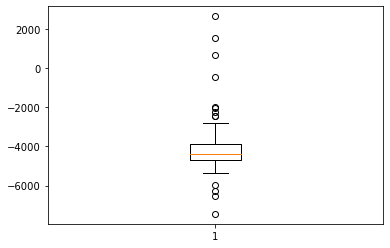

In [50]:
import matplotlib.pyplot as plt

plt.boxplot(yh)

In [56]:


diabetes = datasets.load_diabetes()
X = diabetes.data
t = diabetes.target

NumData, NumFeatures = X.shape

lin = LinearRegression().fit(X, t)
#print(lin.score(X, t))
th1 = lin.predict(X)

w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w
 
rms_linear_models = [round(getPredictionError(th1, t), 3), round(getPredictionError(th2, t), 3)]

data = np.append(test_results, [rms_linear_reg])
data

fig1, ax = plt.subplots()

ax.boxplot([test_results, rms_linear_models])
ax.set_xticklabels(['RBF', 'Linear Regression Models'])
plt.savefig("errorBoxPlot.jpg")


NameError: name 'getPredictionError' is not defined

In [59]:
diabetes = datasets.load_diabetes()
X = diabetes.data
t = diabetes.target

NumData, NumFeatures = X.shape

lin = LinearRegression().fit(X, t)
#print(lin.score(X, t))
th1 = lin.predict(X)

w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w
 
rms_linear_models = [round(getPredictionError(th1, t), 3), round(getPredictionError(th2, t), 3)]

data = np.append(test_results, [rms_linear_reg])
data

fig1, ax = plt.subplots()

ax.boxplot([test_results, rms_linear_models])
ax.set_xticklabels(['RBF', 'Linear Regression Models'])
plt.savefig("errorBoxPlot.jpg")

NameError: name 'getPredictionError' is not defined